In [12]:
from glob import glob
import imageio as iio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
files = glob('../doc/example-data/*.tif')
image0 = iio.imread(files[0], format='fei')

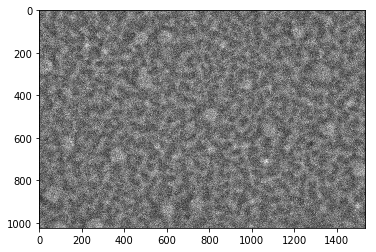

In [11]:
fig, ax = plt.subplots()
ax.imshow(image0, cmap='gray')

Text(0,0.5,'y (nm)')

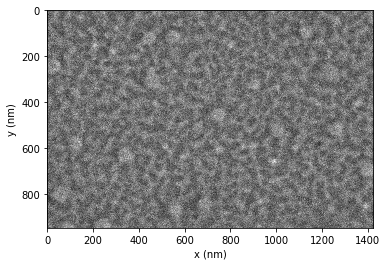

In [13]:
spacing = image0.meta['Scan']['PixelHeight']
spacing_nm = spacing * 1e9
dim_nm = np.array(image0.shape) / spacing_nm

fig, ax = plt.subplots()
ax.imshow(image0, cmap='gray',
          extent=[0, dim_nm[1], dim_nm[0], 0])
ax.set_xlabel('x (nm)')
ax.set_ylabel('y (nm)')

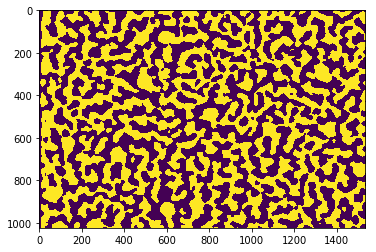

In [14]:
from skan.pre import threshold

smooth_radius = 5 / spacing_nm
threshold_radius = int(np.ceil(50 / spacing_nm))
binary0 = threshold(image0, sigma=smooth_radius,
                    radius=threshold_radius)

fig, ax = plt.subplots()
ax.imshow(binary0)

In [26]:
threshold_radius

47

In [15]:
from skimage import morphology

skeleton0 = morphology.skeletonize(binary0)

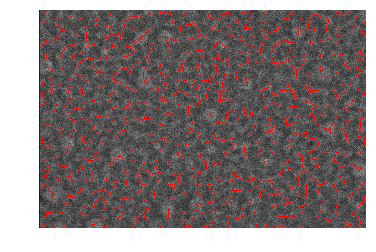

In [17]:
from skan import draw

fig, ax = plt.subplots()
draw.overlay_skeleton_2d(image0, skeleton0, dilate=1, axes=ax)

In [19]:
from skan import csr

pixel_graph, coordinates, degrees = csr.skeleton_to_csgraph(skeleton0)

In [21]:
pixel_graph0, coordinates0, degrees0 = csr.skeleton_to_csgraph(skeleton0,
                                                              spacing=spacing_nm)

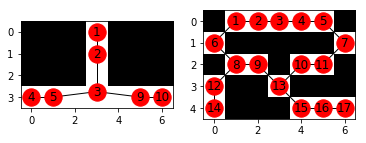

In [22]:
from skan import _testdata
g0, c0, _ = csr.skeleton_to_csgraph(_testdata.skeleton0)
g1, c1, _ = csr.skeleton_to_csgraph(_testdata.skeleton1)
fig, axes = plt.subplots(1, 2)

draw.overlay_skeleton_networkx(g0, c0, image=_testdata.skeleton0,
                               axis=axes[0])
draw.overlay_skeleton_networkx(g1, c1, image=_testdata.skeleton1,
                              axis=axes[1])

In [23]:
branch_data = csr.summarise(skeleton0, spacing=spacing_nm)
branch_data.head()

branch-distance  branch-type  coord-0-0    coord-0-1  coord-1-0  \
0        35.911012            1   7.554190   196.408940  34.173717   
1       102.812724            1   7.554190   339.938550  87.682563   
2        12.966605            1   7.554190   673.402080  14.029210   
3        96.505761            2  48.922373  1055.787983  14.388933   
4        15.124945            1   7.554190  1152.553560  13.219832   

     coord-1-1  euclidean-distance  img-coord-0-0  img-coord-0-1  \
0   179.861667           31.343444              7            182   
1   356.126100           81.747128              7            315   
2   663.419757           11.898430              7            624   
3  1035.643477           39.979490             45            978   
4  1139.603520           14.135170              7           1068   

   img-coord-1-0  img-coord-1-1  node-id-0  node-id-1  skeleton-id  
0             31            166          4        352            1  
1             81            330          5        550            2  
2             13            614         11        197            3  
3             13            959        470        209            4  
4             12           1056         28        208            4

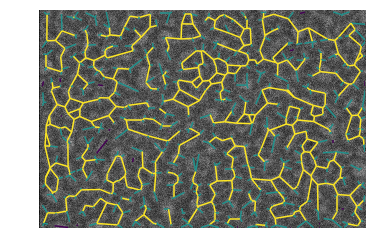

In [24]:
draw.overlay_euclidean_skeleton_2d(image0, branch_data, skeleton_color_source='branch-type')